In [10]:
from haskellian import either as E
import pure_cv as vc
import scoresheet_models as sm
import sequence_edits as se
from moveread.core import Core, Image, Player, cli
from haskellian import iter as I

models = sm.ModelsCache()

In [2]:
core = Core.at('dev/llobregat-b-1/')
keys = (await core.games.keys()).unsafe()
game = (await core.games.read(keys[0])).unsafe()

In [3]:
player = game.players[0]
pgn = ['e4', 'e5', 'Nf3', 'Nf6', 'Nc3', 'd6', 'd4', 'Nbd7', 'Bc4', 'Be7', 'O-O', 'O-O', 'a4', 'c6']

In [27]:
player.meta.edits = [se.Skip(2), se.Insert(3)]
player.meta.edits

[Skip(idx=2, type='skip'), Insert(idx=3, value=None, type='insert')]

In [25]:
samples = (await player.ocr_samples(pgn, blobs=core.blobs, models=models)).unsafe()

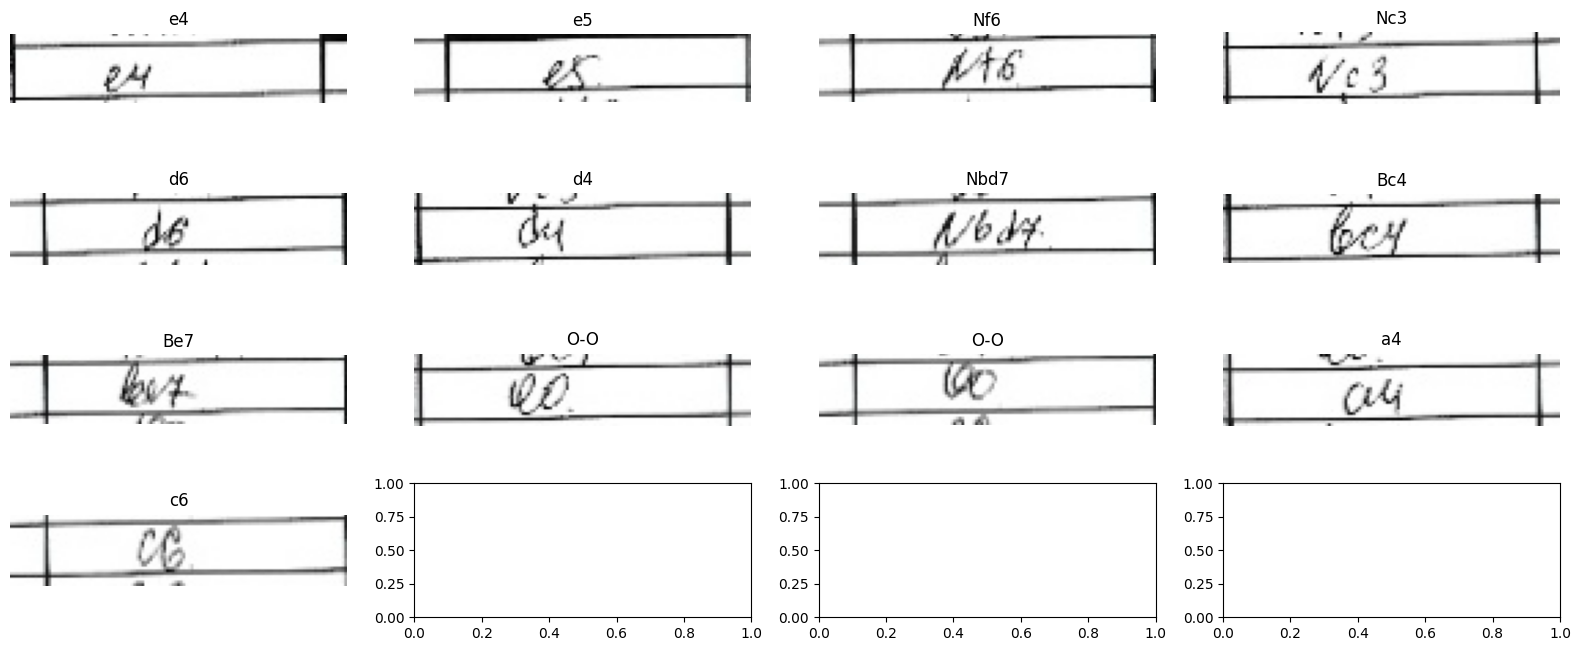

In [26]:
vc.show(*[(lab, img) for img, lab in samples[:16]], ncols=4, height=2)